# Part II - Investigating Bike Trip Durations and User Characteristics
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<h2><span style="color:black">by </span><span style="color:blue">Bukunmi Adebanjo</span><h2>

** **

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Investigation Overview


>> - <span style="color:blue">This presentation will explore variables of interest such as gender, start_station, end_station, age,start_time, user types and trip duration. Particularly, how trip duration varies amongst different gender groups,user types and hours of the day. Also, using trip durations as a metric to determine the busiest Start and End bike stations and what gender groups engages these busy stations the most in terms of trip duration.</span>                    
>> - <span style="color:blue">The presentation will begin with a look at the duration variable, and then I'll gradually introduce other variables to highlight the probable linkages and correlations between them. In other words a flow from Univariate to Bivariate and Multivariate plots will be deployed for this presentation to better communicate necessary insights.</span> 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Dataset Overview

> <span style="color:blue">Ford Gobike system Data contains individual rides in a bike-sharing system spanning the larger San Francisco Bay area included in the 'fordgobike-tripdata' data file of over 180,000 records. Contained within the dataset is a total of 16 variables(dependent and non-dependent) before cleaning which was modified to 14 variables afterwards:</span>
** **
** **
>>             AFTER CLEANING                                         BEFORE CLEANING               
>>         Variable             Data_ Type                     Variable                Data_ Type         
>>      1. start_time             object                    1. duration_sec                 int64             
>>      2. end_time               object                    2. start_time                  object
>>      3. start_station_id        int64                    3. end_time                    object
>>      4. start_station_name     object                    4. start_station_id           float64
>>      5. end_station_id          int64                    5. start_station_name          object
>>      6. end_station_name       object                    6. start_station_latitude     float64
>>      7. end_station_name       object                    7. start_station_longitude    float64
>>      8. user_type              object                    8. end_station_id             float64
>>      9. member_birth_year       int64                    9. end_station_name            object
>>     10. member_gender          object                   10. end_station_latitude       float64
>>     11. duration_min          float64                   11. end_station_longitude      float64
>>     12. start_time_hr           int64                   12. bike_id                      int64
>>     13. end_time_hr             int64                   13. user_type                   object
>>     14. member_age              int64                   14. member_birth_year          float64
>>                                                         15. member_gender               object
>>                                                         16. bike_share_for_all_trip     object
** **


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikeshare = pd.read_csv('bike_rides.csv')

In [3]:
bikeshare.dtypes

start_time             object
end_time               object
start_station_id        int64
start_station_name     object
end_station_id          int64
end_station_name       object
bike_id                 int64
user_type              object
member_birth_year       int64
member_gender          object
duration_min          float64
start_time_hr           int64
end_time_hr             int64
member_age              int64
dtype: object

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Distribution of Trip Duration

> <span style="color:blue">A transformed Duration variable is included in the dataset used for this visualization. This variable, which was originally in seconds, was difficult to understand due to the wide range of integer values, necessitating the conversion to minutes.                                                                                                   
A log scale was also used to help drill down into this variable and provide a more appropriate depiction. This made it easier to see that the duration variable had a wide range of values, with a peak at about the 10 minutes mark and a minimum trip duration of about 1 minute.</span>

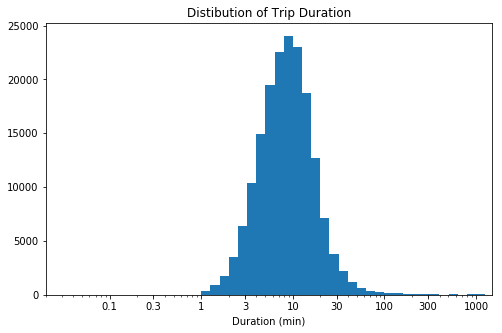

In [4]:
#log transformation plot
binsize2 = 0.1
bins = 10 ** np.arange(0,np.log(bikeshare['duration_min'].max())+binsize2 , binsize2)
ticks =  [0.1, 0.3, 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]


plt.figure(figsize=[8, 5])
plt.hist(data = bikeshare, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (min)')
plt.title('Distibution of Trip Duration')
plt.xlim(0.02,1500);

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Bike Trips Start Time Distribution & Bike Trips End Time Distribution

> <span style="color:blue">The best times to start travels are at 8 a.m. and 5 p.m. on opposite sides of the day. The majority of bike rides end at 5 p.m. and 8 a.m., respectively. This allows us to identify 8 a.m. and 5 p.m. as the busiest hours of the day for bike stations in the San Francisco Bay Area. This could owe to the fact that the most common trip duration is aroud 10 minutes according to the previous visualisation.</span>

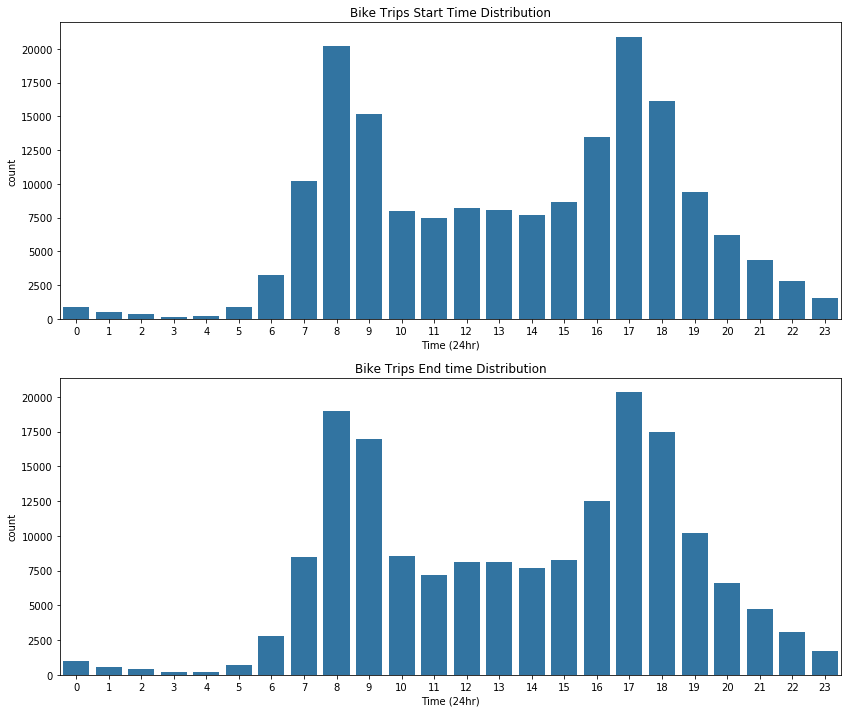

In [5]:
#Plot for most prefered time to start a bike trip and most common time to end trips
base_color = sb.color_palette()[0]
plt.figure(figsize = [14, 12])
plt.subplot(2, 1, 1)
sb.countplot(data = bikeshare, x = 'start_time_hr', color = base_color)


plt.title('Bike Trips Start Time Distribution')
plt.xlabel('Time (24hr)');

plt.subplot(2, 1, 2)

sb.countplot(data = bikeshare, x = 'end_time_hr', color = base_color)

    
plt.title('Bike Trips End time Distribution')
plt.xlabel('Time (24hr)');


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Top Five Busiest (Start and End) Bike Stations

> <span style="color:blue">The top two busiest end stations are 'San Francisco Caltrain Station 2' and 'Market St at 10th St' with both of them switching postions for the start station. Considering the both start and end station, San Francisco Caltrain Station 2 is busiest bike station. It would be intuitive to assume that these two stations are most likely around ten minutes apart based on what the duration distribution chart communicated.</span>


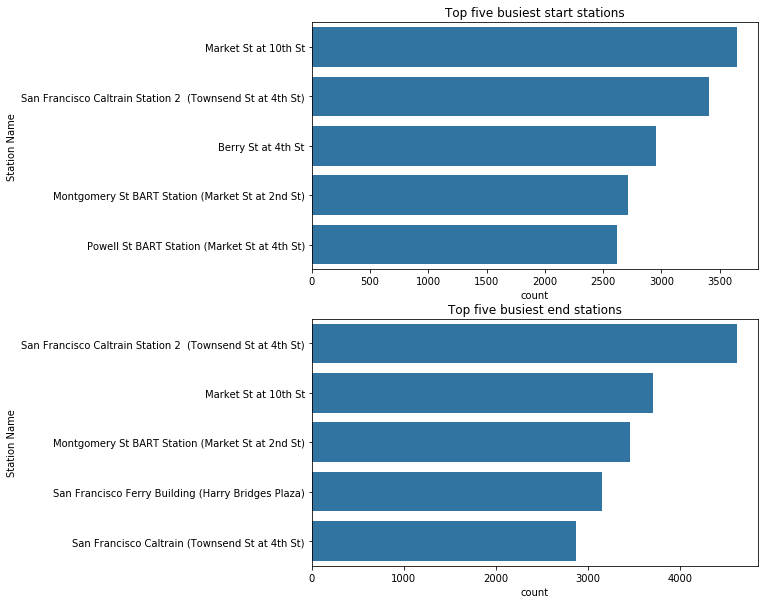

In [6]:
#setting color palette and figure size for the plots
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 10])

#Creation of plot for top five busiest bike starting stations
plt.subplot(2, 1, 1)

station_order = bikeshare['start_station_name'].value_counts().iloc[:5].index
sb.countplot(data = bikeshare, y = 'start_station_name', color = base_color, order = station_order)


    
plt.title('Top five busiest start stations')
plt.ylabel('Station Name')

#Creation of plot for top five busiest bike starting stations
plt.subplot(2, 1, 2)

station_order = bikeshare['end_station_name'].value_counts().iloc[:5].index
sb.countplot(data = bikeshare, y = 'end_station_name', color = base_color, order = station_order)


    
plt.title('Top five busiest end stations')
plt.ylabel('Station Name');

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Ride Duration VS Start Time

> <span style="color:blue">Increased correlation is observed as the day progresses and a slight gradual decline in correlation is observed after 5 p.m. Users who started their rides between noon toward the late hours of the day tend to frequently take longer trips as opposed to the early hours of the day. In order words, longer trips are more associated with later hours of the day starting from 1 p.m.</span>


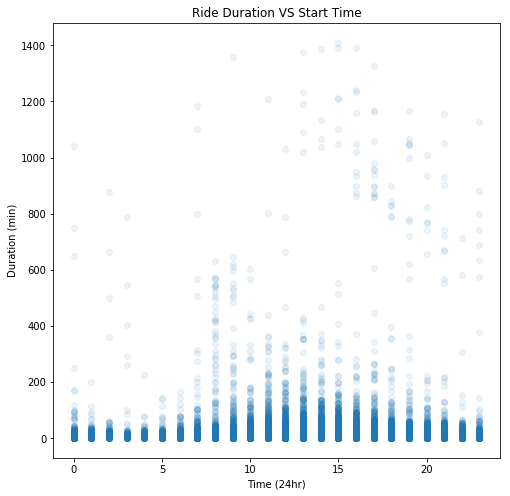

In [7]:
plt.figure(figsize = [8, 8])


#Plot relationship between duration and start time
plt.scatter(data = bikeshare, x = 'start_time_hr', y = 'duration_min', alpha = 1/12)
plt.xlabel('Time (24hr)')
plt.ylabel('Duration (min)')
plt.title('Ride Duration VS Start Time');

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Ride Duration VS User Type/Gender Type

> <span style="color:blue">A majority of the subscriber category members' travel duration fall within the range of 1 to 10 minutes with over 50% falling below 10 minutes. The customer category have slightly over 25% of them with trip durations lower than 10 minutes while the rest fall above the 10 minutes cap. A more spreadout trip duration distribution is obeserved in the customer category type.</span>     
> <span style="color:blue">The 'male', 'female' and 'other' gender types show similiar trip duration distribution regardless of their respective sample size percentage. Majority of the gender class travel between 10 minutes duration and below.</span>  `

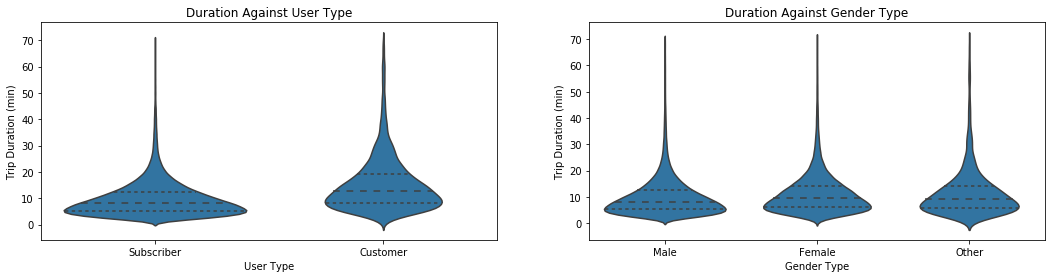

In [8]:
# scatter plot of duration vs user type
sample = bikeshare[bikeshare['duration_min'] < 70]
base_color = sb.color_palette()[0]
plt.figure(figsize = [18, 4])

#Plot relationship between duration and user category
plt.subplot(1, 2, 1)

sb.violinplot(data= sample, x = 'user_type', y = 'duration_min', color=base_color, inner='quartile')


plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against User Type')

#Plot relationship between duration and gender type
plt.subplot(1, 2, 2)

sb.violinplot(data= sample, x = 'member_gender', y = 'duration_min', color=base_color, inner='quartile')


plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against Gender Type');

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Gender Activity by Minutes Across Top 5 Busiest Start Stations

> <span style="color:blue"> A large male gender percentage in the dataset does not directly translate to dominance in all relationships, which surprised me. The 'San Francisco Caltrain Station 2' and 'Powell St BART Station (Market St at 4th St)' stations are the busiest in terms of longer trip durations, this is oweing to the Other gender category as shown in the top 5 busiest start stations.</span> `

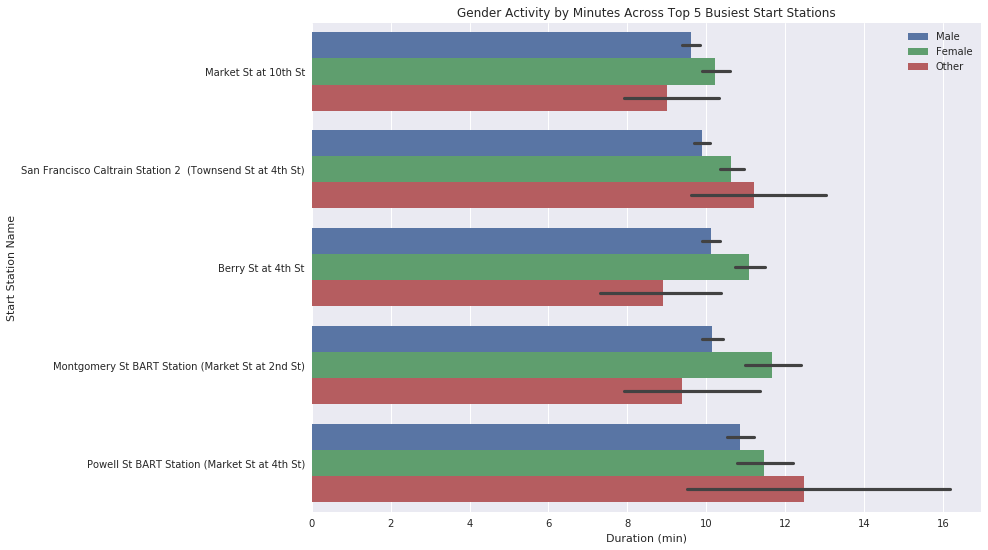

In [9]:
#Plotting a stacked barplot for gender category of busiest start stations by trip durations
sb.set(rc={"figure.figsize":(12, 9)})
station_order = sample['start_station_name'].value_counts().iloc[:5].index
sb.barplot(data = sample, x = 'duration_min', y = 'start_station_name', hue = 'member_gender', order = station_order)
plt.legend()

plt.ylabel('Start Station Name')
plt.xlabel('Duration (min)')
plt.title('Gender Activity by Minutes Across Top 5 Busiest Start Stations');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 513211 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 